<a href="https://colab.research.google.com/github/odu-cs625-datavis/fall23-mcw-maazhasnainkhan/blob/main/HW3/CS_625_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


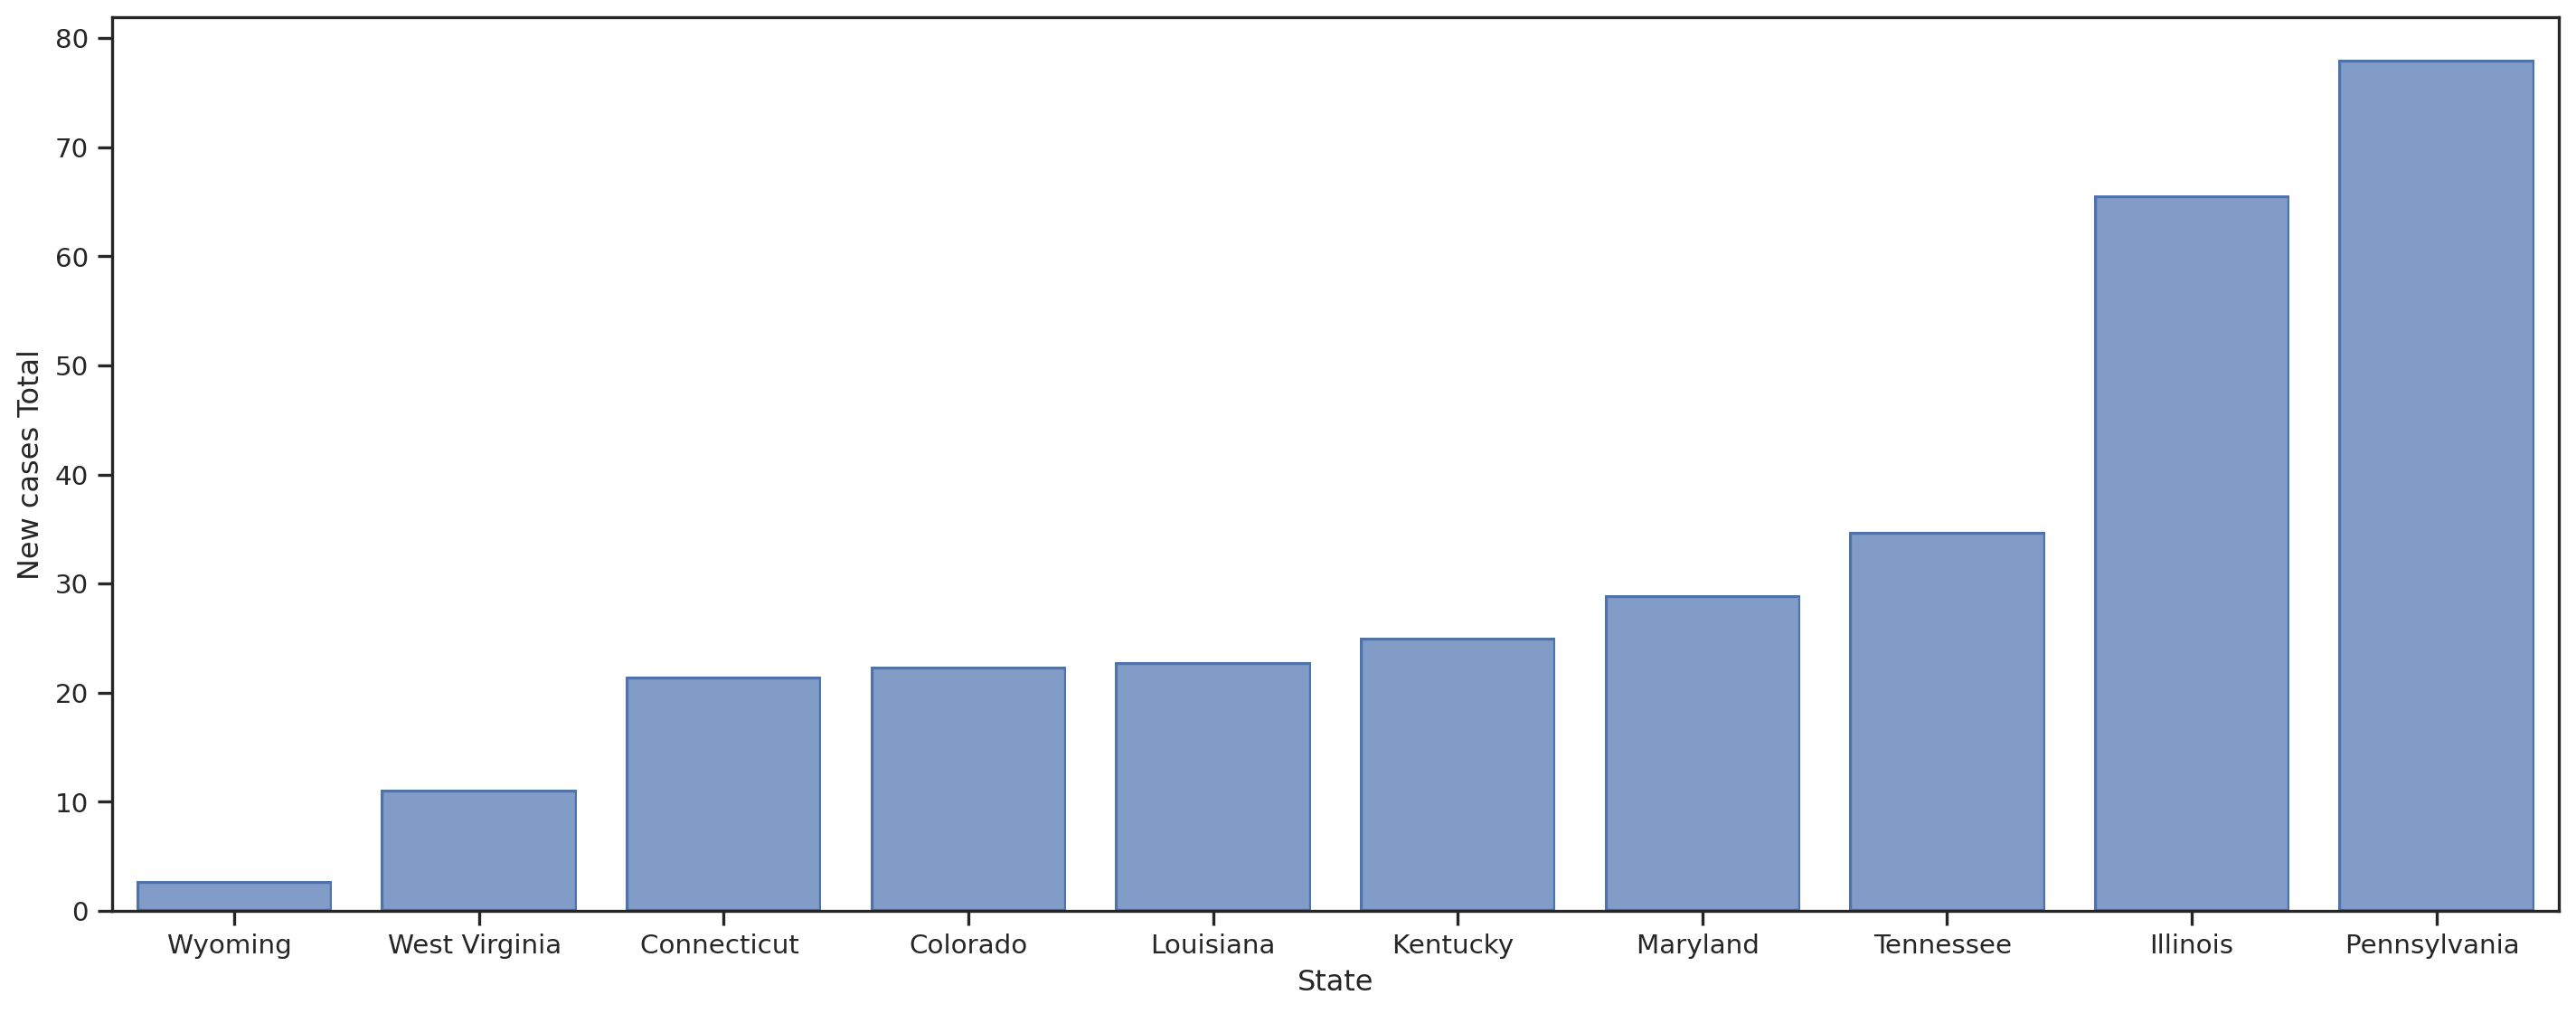

In [1]:
import pandas as pd
from pandas import DataFrame
from google.colab import drive
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import axes_style

drive.mount("/content/drive", force_remount = True)
cancer_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW3/Cancer-Data-Cleaned.csv")

cancer_data_wo_us = cancer_data.drop(0, axis=0)
cancer_data_10_samples = cancer_data_wo_us.sample(10)
cancer_data_state = cancer_data_10_samples.iloc[:,[0,1]]

cancer_data_state= cancer_data_state.sort_values(by=['New cases Total'])

(
    so.Plot(data=cancer_data_state, x='State', y='New cases Total').layout(size=(15, 6))
    .add(so.Bar())
    .theme({**axes_style("ticks")})
    .add(so.Text(halign="left"))
    .plot()
)


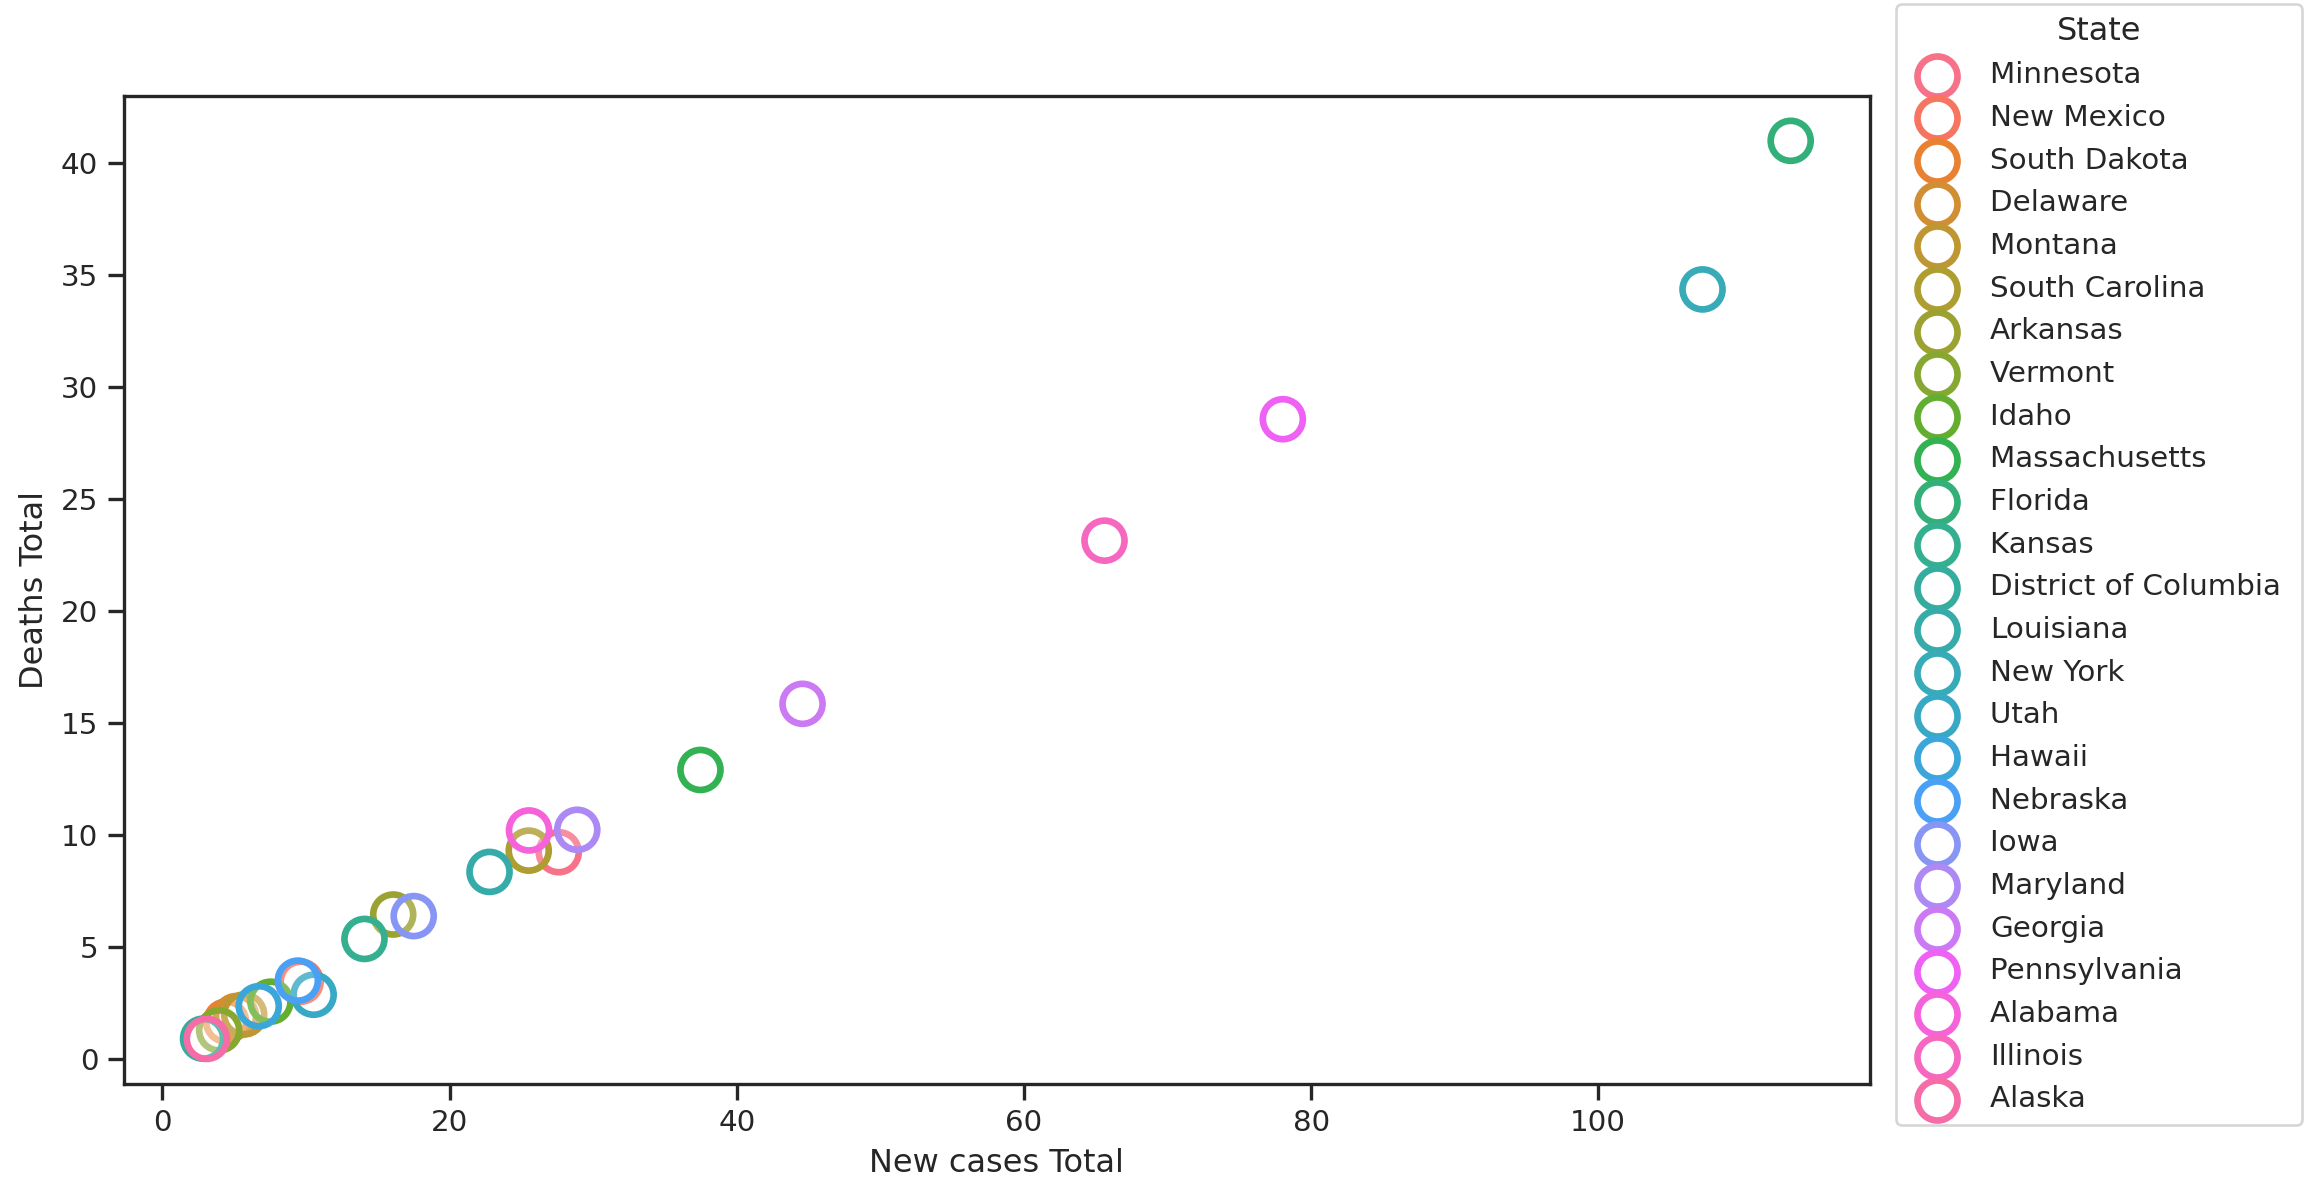

In [ ]:
cases_death_cancer_data = cancer_data.drop(0, axis=0)
cases_death_cancer_data_25 = cases_death_cancer_data.sample(25)
(
    so.Plot(data=cases_death_cancer_data_25,
    x='New cases Total',
    y='Deaths Total',
    color='State',).layout(size=(10, 6))
    .add(so.Dots(pointsize=15,fillcolor="white", stroke=2.5))
    .theme({**axes_style("ticks")})
)


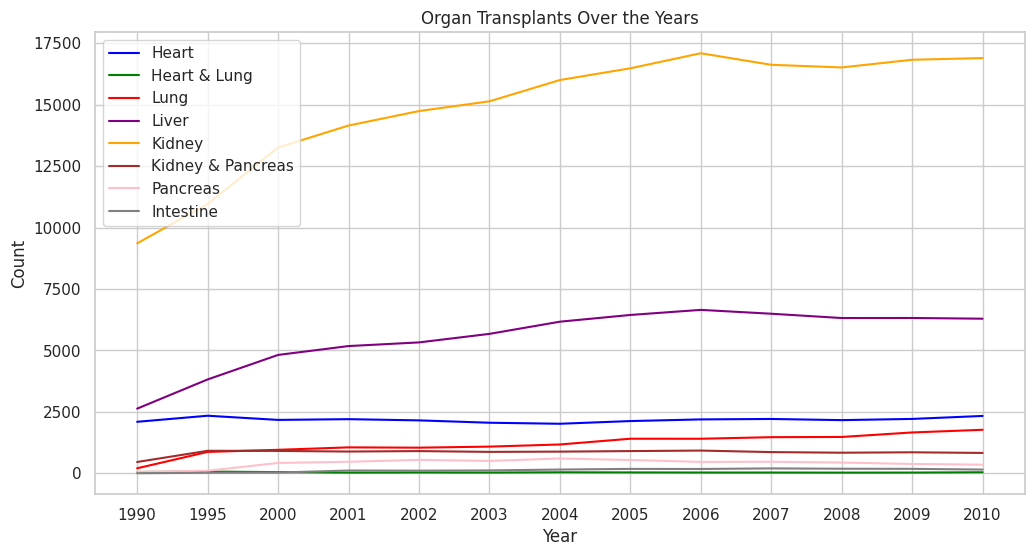

In [ ]:
from matplotlib.lines import Line2D
import pandas as pd
from pandas import DataFrame
from google.colab import drive
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import axes_style

organ_data = pd.read_csv("/content/drive/MyDrive/CS_625_HW3/Organ-Transplant.csv")
organ_data = organ_data.T
organ_data.index.name = 'Year'

cleaned_organ_data = organ_data.drop('Procedure', axis=0)

plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

line_styles = ['-', '-', '-', '-', '-', '-', '-', '-']
line_colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

legend_labels = ["Heart", "Heart & Lung", "Lung", "Liver",
                 "Kidney", "Kidney & Pancreas", "Pancreas", "Intestine"]

for i, (label, color, style) in enumerate(zip(legend_labels, line_colors, line_styles)):
    sns.lineplot(data=cleaned_organ_data[i], label=label, color=color, linestyle=style)

plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Organ Transplants Over the Years")

legend_elements = [
    Line2D([0], [0], color=color, linestyle=style, label=label)
    for label, color, style in zip(legend_labels, line_colors, line_styles)
]

plt.legend(handles=legend_elements)

plt.show()
